# Libraries and Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Business Analyst course/Data Visualization/Distribution Charts and Data Viz Basics

/content/drive/MyDrive/Business Analyst course/Data Visualization/Distribution Charts and Data Viz Basics


In [13]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [4]:
# Load the data
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
# Information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


# Histogram

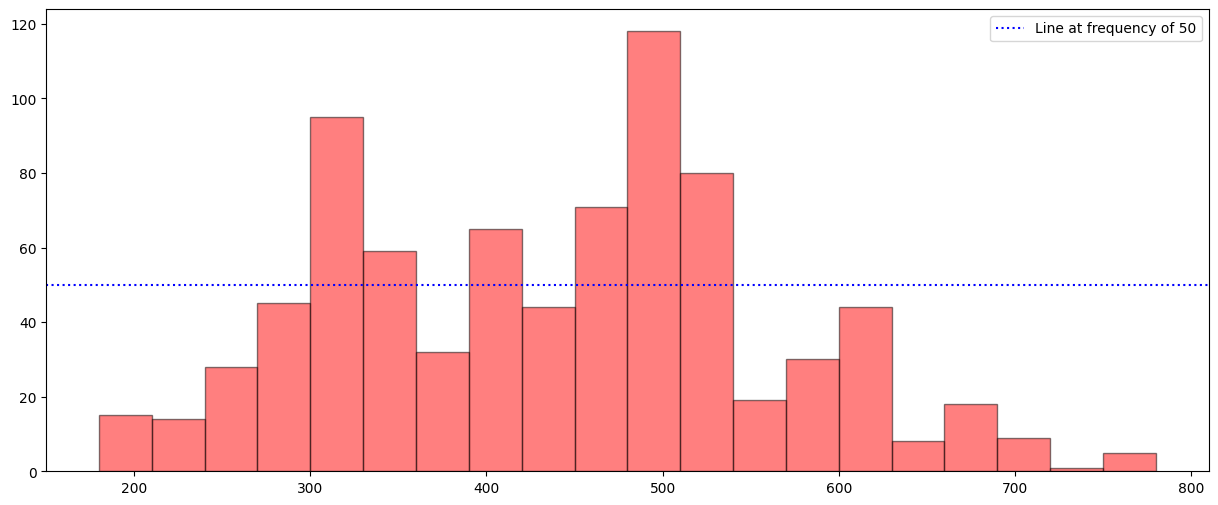

In [6]:
# Defining the plot size
fig, ax = plt.subplots(figsize = (15, 6))

# Histogram
ax.hist(df.Total,
        bins =20,
        edgecolor = 'black',
        color = 'red',
        alpha = 0.5,
      #  range = (400,600)
        )

# # Add a Vertical line
# ax.axvline(df.Total.median(),
#            color = 'black',
#            ls = "dashed",
#            label = "Median Total Power")

# Add a horizontal line
ax.axhline(50,
           color = 'blue',
           ls = 'dotted',
           label = "Line at frequency of 50")


# Plotting
ax.legend()
plt.show()

# Box Plot - Analyzing the Attack stat by generation

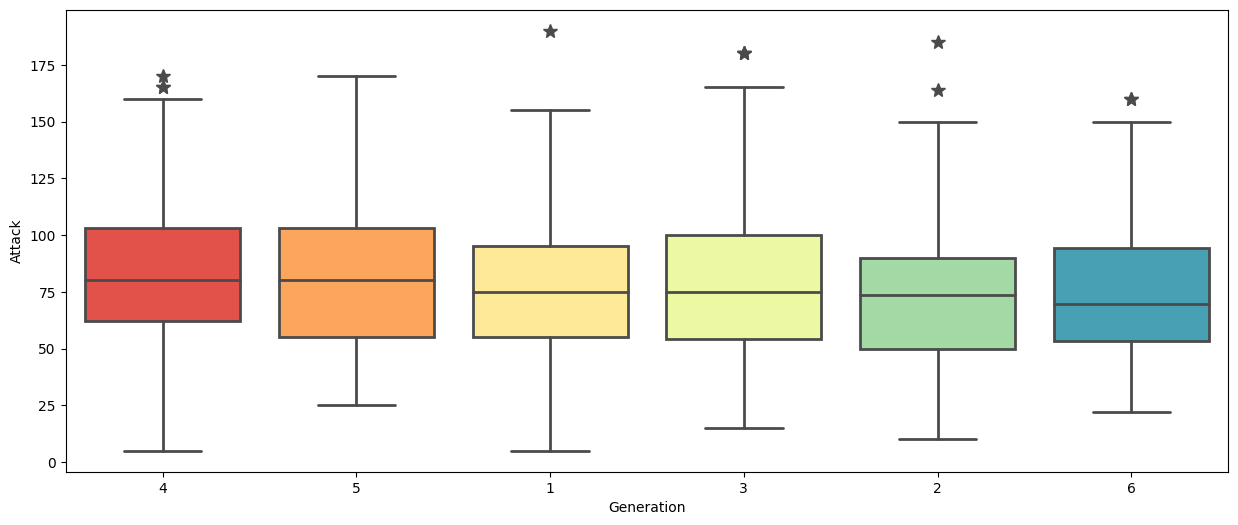

In [7]:
# Defining the plot size
fig, ax = plt.subplots(figsize = (15, 6))
sns.set_theme(style = "darkgrid")

# Set the Order
order = df.groupby(
    by = ["Generation"])["Attack"].median().sort_values(
        ascending = False).index
# Box Plot
sns.boxplot(x = df.Generation,
            y = df.Attack,
            palette = "Spectral",
            saturation = 2,
            orient = 'v',
            whis = 1.5,
            linewidth = 2,
            width = 0.8,
            flierprops = {"marker": "*"},
            fliersize = 10,
            order =  order)

# # Add a data points to the box plot
# ax = sns.swarmplot(x = df.Generation,
#                    y = df.Attack,
#                    color = "grey",
#                    order = order)

plt.show()

In [8]:
# Who is the Pokemon with the highest attack stat
df[df.Attack == df.Attack.max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


### Standard outlier removal technics
1) Interquartile range set to 1.5
2) Standard deviations +- 3
3) eyeball it

# Violin Plot - Total Stats per Generation

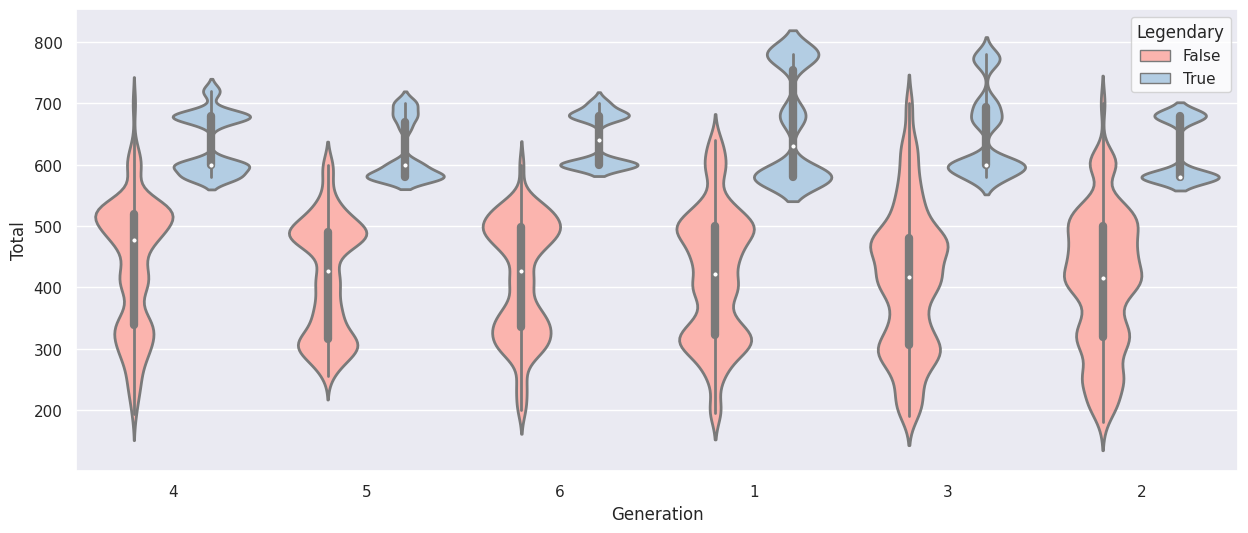

In [9]:
# Defining the plot size
fig, ax = plt.subplots(figsize = (15, 6))
sns.set_theme(style = "whitegrid")

# Set the Order
order = df.groupby(
    by = ["Generation"])["Total"].median().sort_values(
        ascending = False).index

# Box Plot
sns.violinplot(x = df.Generation,
            y = df.Total  ,
            palette = "Pastel1",
            saturation = 2,
            hue = df.Legendary,
            orient = 'v',
            linewidth = 2,
            order =  order,
            scale = "width", # width, area, count
            bw = 0.2
               )


plt.show()

# Ridge Line Chart - Speed Stat per Generation

In [10]:
# Group Speed by generation
df_speed = df.groupby(['Generation', 'Speed']).agg({'Speed': 'count'}).rename(
    columns = {'Speed': 'count'}).reset_index()
df_speed.head()

,Generation,Speed,count
0,1,15,1
1,1,20,2
2,1,25,3
3,1,30,7
4,1,35,7


In [ ]:
# Store each Generation Speed and we Normalize everything
dict_values = {}
for gen in df.Generation.unique():
  dict_values[f'x_{gen}'] = df_speed[df_speed['Generation'] == gen]['Speed']
  dict_values[f'y_{gen}'] = df_speed[df_speed['Generation'] == gen]['count']
  dict_values[f'y_{gen}'] = (
      dict_values[f'y_{gen}'] - dict_values[f'y_{gen}'].min()) \
      / (dict_values[f'y_{gen}'].max() - dict_values[f'y_{gen}'].min())

dict_values

In [31]:
# Start the plot
fig = go.Figure()

for index, gen in enumerate(df.Generation.unique()):
  # Build the chart
  fig.add_trace(go.Scatter(x = [df.Speed.min() -10, df.Speed.max() +10],
                           y = np.full(2, len(df.Generation.unique()) - index),
                           mode = 'lines',
                           line_color = 'white'))

  # Add the data
  fig.add_trace(go.Scatter(x = dict_values[f'x_{gen}'],
                           y = dict_values[f'y_{gen}'] + (
                              len(df.Generation.unique()) - index
                           ) +0.1,
                           fill = 'tonexty',
                           name = f'{gen}'))

  # Add some text to the figure
  fig.add_annotation(x = df.Speed.min(),
                     y = len(df.Generation.unique()) - index,
                     text = f'{gen}',
                     showarrow = False,
                     yshift = 10)

# Customizing the layout
fig.update_layout(title = "Development of Pokemon Speed per Generation",
                  showlegend = False,
                  xaxis = dict(title = 'Speed'),
                  yaxis = dict(title = 'Generation',
                               showticklabels = False))


fig.show()

In [32]:
# HTML export
fig.write_html("ridgeline.html")